# Doppelganger



[![Voilla](https://raw.githubusercontent.com/Rahuketu86/voila_dashboards/main/badge_viola_logo.svg)](https://mybinder.org/v2/gh/Rahuketu86/voila_env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252FRahuketu86%252Fvoila_apps%26urlpath%3Dvoila%252Ftree%252Fvoila_apps%252Fbook%252FSimple%252FDoppelganger.ipynb%26branch%3Dmaster)



[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Rahuketu86/voila_env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252FRahuketu86%252Fvoila_apps%26urlpath%3Dtree%252Fvoila_apps%252Fbook%252F%252FSimple%252FDoppelganger.ipynb%26branch%3Dmaster)

Upload Picture of Doppelganger and let system recognize who is who

1. Sarah Shahi vs Mercedes_Masohn 
2. Brad Pitt vs Benicio del toro
3. Javiar Bardem vs Jeffery Dean Morgan

---

In [22]:
import ipywidgets as widgets
import PIL
from PIL import Image
from fastai.vision.all import *

In [23]:
widget_upload = widgets.FileUpload()

In [24]:
widget_upload

FileUpload(value={}, description='Upload')

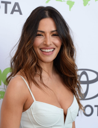

In [25]:
img = None
if len(widget_upload.data):
    img = PILImage.create(widget_upload.data[-1])
    
else:
    img = PILImage.create("../Models/Doppelganger/Sarah_Shahi.jpg")
display(img.to_thumb(128,128)) 

In [26]:

widget_out = widgets.Output()

In [27]:
widget_out

Output()

In [28]:
with widget_out: display(img.to_thumb(128,128))

In [29]:
widget_label = widgets.Label()

In [30]:
widget_label

Label(value='')

In [31]:
widget_label.value = "Please Upload Photo"

In [32]:
learn_inf = load_learner(fname = "../Models/Doppelganger/DoppelGanger.pkl")

In [33]:
! ls  ../Models/Doppelganger

DoppelGanger.pkl  Sarah_Shahi.jpg


In [34]:
pred, idx, probs = learn_inf.predict(img)
widget_label.value = f"Actor: {pred} with probability {probs[idx]:0.4f}"

In [35]:
def on_data_change(change):
    widget_label.value = ""
    img = PILImage.create(widget_upload.data[-1])
    widget_out.clear_output()
    with widget_out: display(img.to_thumb(128,128))
    pred, idx, probs = learn_inf.predict(img)
    widget_label.value = f"Actor: {pred} with probability {probs[idx]:0.4f}"

In [36]:
widget_upload.observe(on_data_change, names=['data'])

In [37]:
widgets.VBox([widgets.Label("Awesome, Doppelganger Predictor"), widget_label, widget_out, widget_upload])